In [17]:
import jetnet
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 16})


In [11]:
%load_ext autoreload
%autoreload 2

In [68]:
import os

plot_dir = "../plots/jet_plots/Oct4"
_ = os.system(f"mkdir -p {plot_dir}")

In [14]:
truth_jets_pf, _ = jetnet.datasets.JetNet.getData(
    "g",
    data_dir="/Users/raghav/Documents/CERN/gen-models/MPGAN/datasets/",
    split_fraction=[1.0, 0, 0],
    jet_features=["pt", "eta", "mass", "num_particles"],
)


In [72]:
efps = jetnet.utils.efps(truth_jets_pf[:, :, :3], efpset_args=[("d<=", 4)])

In [75]:
np.save("efps", efps)

In [74]:
efps.shape

(177252, 36)

In [15]:
mass = jetnet.utils.jet_features(truth_jets_pf[:, :, :3])["mass"]


In [66]:
from typing import OrderedDict
from coffea.lookup_tools.dense_lookup import dense_lookup

np.random.seed(4)

bins = np.linspace(0, np.max(mass), 26)
true_mass_hist = np.histogram(mass, bins)[0]

smeared_hist = np.histogram(mass * np.random.normal(1, 0.25, size=mass.shape), bins)[0]
shifted_hist = np.histogram(mass * np.random.normal(1.1, 0.05, size=mass.shape), bins)[0]

smeared_lookup = dense_lookup(smeared_hist / true_mass_hist, bins)
shifted_lookup = dense_lookup(shifted_hist / true_mass_hist, bins)

dists = OrderedDict(
    [
        ("smeared", (smeared_lookup(mass), "Smeared")),
        ("shifted", (shifted_lookup(mass), "Shifted")),
        ("tailcut", ((mass < 0.17).astype(float), "Removing Tail")),
    ]
)


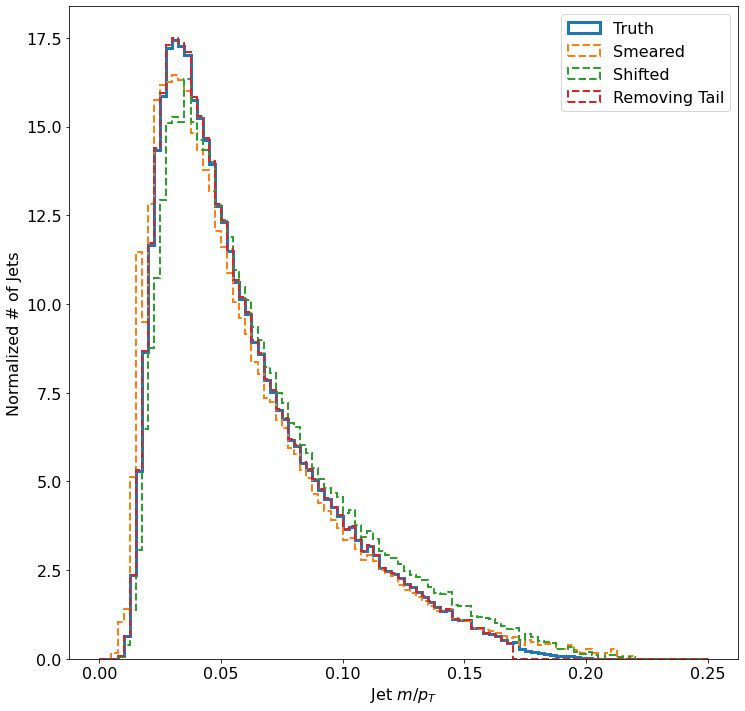

In [69]:
plt.figure(figsize=(12, 12))

_ = plt.hist(mass, np.linspace(0, 0.25, 101), histtype="step", label="Truth", linewidth=3, density=True)
for weights, label in dists.values():
    _ = plt.hist(
        mass,
        np.linspace(0, 0.25, 101),
        weights=weights,
        histtype="step",
        label=label,
        linewidth=2,
        linestyle="dashed",
        density=True
    )
plt.legend()
plt.xlabel(r"Jet $m/p_T$")
plt.ylabel("Normalized # of Jets")
plt.savefig(f"{plot_dir}/jet_dists.pdf", bbox_inches="tight")
